In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Source: Gupta et al.
d = np.linspace(200, 500, 2)
t = np.linspace(300, 1000, 2)
ar_Gupta = np.outer(t, 1/d)
print(f't/d ranges from {ar_Gupta.min():.3} to {ar_Gupta.max():.3}')
ar_Gupta = np.log10(ar_Gupta)
print(f'log10(t/d) ranges from {ar_Gupta.min():.3} to {ar_Gupta.max():.3}')

t/d ranges from 0.6 to 5.0
log10(t/d) ranges from -0.222 to 0.699


<AxesSubplot:xlabel='td'>

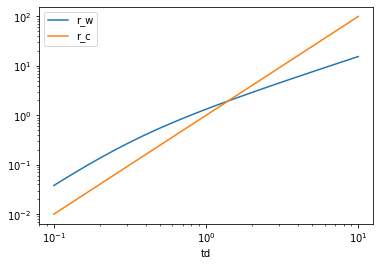

In [3]:
df = (
    pd.DataFrame(
        {'td' : np.logspace(-1, 1, 50)}
    )
    .assign(r_w = lambda df: df.td*np.arctan(4*df.td))
    .assign(r_c = lambda df: df.td**2)
    .assign(R_0 = 1)
     )

df.plot('td',
        ['r_w', 'r_c'],
       logx = True,
       logy = True,
       )

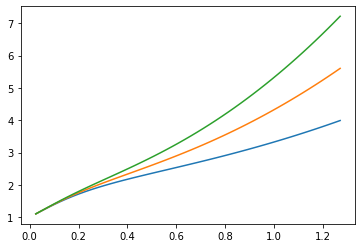

In [4]:
def get_curve(Rc, Rw, R0):
    def res(xis):
        return Rc*xis**2 + Rw*np.arctan(4*xis) + R0
    return res

xs = np.linspace(0.025, 1.27)

for rc in np.linspace(1, 3, 3):
    plt.plot(xs, get_curve(rc, 1, 1)(xs))
plt.show()

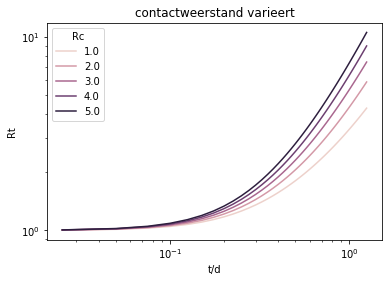

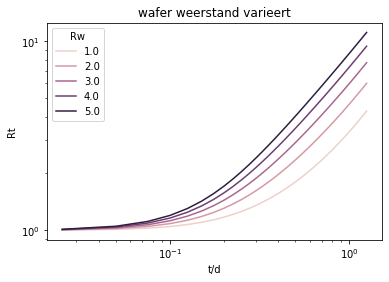

In [5]:
def cartesian_product(d):
    index = pd.MultiIndex.from_product(d.values(), names = d.keys())
    return pd.DataFrame(index = index).reset_index()

def compute_Rt(df):
    return df.Rc*df.x**2 + df.Rw*df.x*np.arctan(4*df.x) + df.R0

params = {
    'x' : np.linspace(0.025, 1.25),
    'R0' : [1],
}


p = sns.lineplot(
    x = 'x',
    y = 'Rt',
    hue = 'Rc',
    data = (
        cartesian_product({'Rc' : np.linspace(1, 5, 5), 
                           'Rw' : [1], 
                           **params})
        .assign(Rt = compute_Rt)
    ),
)

p.set(
    xlabel = 't/d', 
    title = 'contactweerstand varieert',
    xscale = 'log',
    yscale = 'log',
)
plt.show()


p = sns.lineplot(
    x = 'x',
    y = 'Rt',
    hue = 'Rw',
    data = (
        cartesian_product({'Rw' : np.linspace(1, 5, 5), 
                           'Rc' : [1], 
                           **params})
        .assign(Rt = compute_Rt)
    ),
)

p.set(
    xlabel = 't/d', 
    title = 'wafer weerstand varieert',
    xscale = 'log',
    yscale = 'log',
)
plt.show()




In [ ]:
sns.heatmap(
    data = cartesian_product(
)